#import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('statsfinal.csv')

In [4]:
# Checking the first 5 and last 5 rows of the dataset
data.head(-1)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4594,4594,29-01-2023,1227,3044,5510,1896,3889.59,19298.96,29864.20,13518.48
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62


In [5]:
# drop the first column
data = data.drop(columns=['Unnamed: 0'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4600 non-null   object 
 1   Q-P1    4600 non-null   int64  
 2   Q-P2    4600 non-null   int64  
 3   Q-P3    4600 non-null   int64  
 4   Q-P4    4600 non-null   int64  
 5   S-P1    4600 non-null   float64
 6   S-P2    4600 non-null   float64
 7   S-P3    4600 non-null   float64
 8   S-P4    4600 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 323.6+ KB


In [7]:
data.isnull().sum()

Date    0
Q-P1    0
Q-P2    0
Q-P3    0
Q-P4    0
S-P1    0
S-P2    0
S-P3    0
S-P4    0
dtype: int64

In [8]:
# Extract year from the 'Day' 'Month' 'year' from the 'Date' column using a lambda function
# We need to get the year from the data to analyse sales year to year
data['Day'] = data['Date'].apply(lambda x: x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Year'] = data['Date'].apply(lambda x: x.split('-')[2])
data

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


In [9]:
#Create a function that allows us to plot a bar chart for the 4 products
def plot_bar_chart(df, columns, stri, str1, val):
    # Aggregate sales for each product by year, by sum or mean
    if val == 'sum':
        sales_by_year = df.groupby('Year')[columns].sum().reset_index()
    elif val == 'mean':
        sales_by_year = df.groupby('Year')[columns].mean().reset_index()

    # Melt the data to make it easier to plot
    sales_by_year_melted = pd.melt(sales_by_year, id_vars='Year', value_vars=columns, var_name='Product', value_name='Sales')

    # Create a bar chart
    plt.figure(figsize=(20,4))
    sns.barplot(data=sales_by_year_melted, x='Year', y='Sales', hue='Product') #,palette="cividis")
    plt.xlabel('Year')
    plt.ylabel(stri)
    plt.title(f'{stri} by {str1}')
    plt.xticks(rotation=45)
    plt.show()

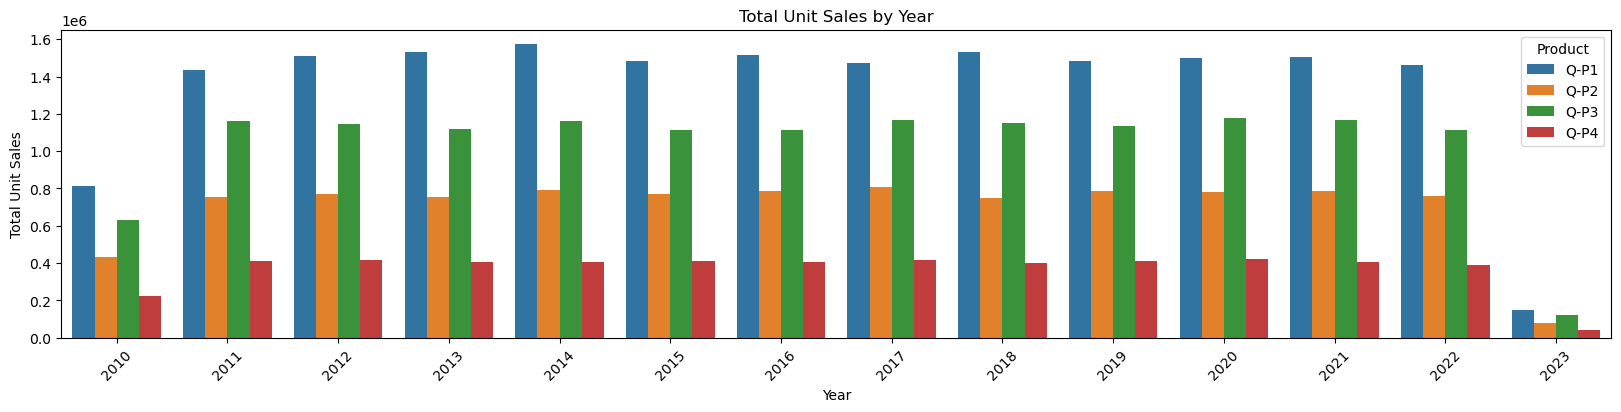

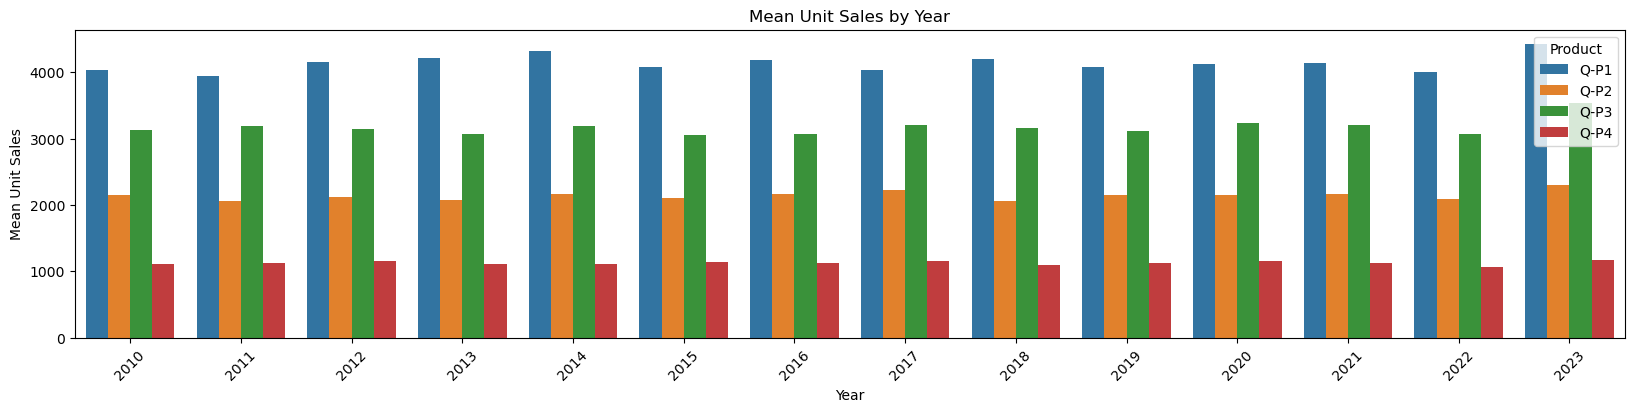

In [10]:
#use the plot_bar_chart function, enter the Unit Sales Columns and the Unit Sales string
plot_bar_chart(data, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Total Unit Sales', 'Year', 'sum')

plot_bar_chart(data, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Mean Unit Sales', 'Year', 'mean')

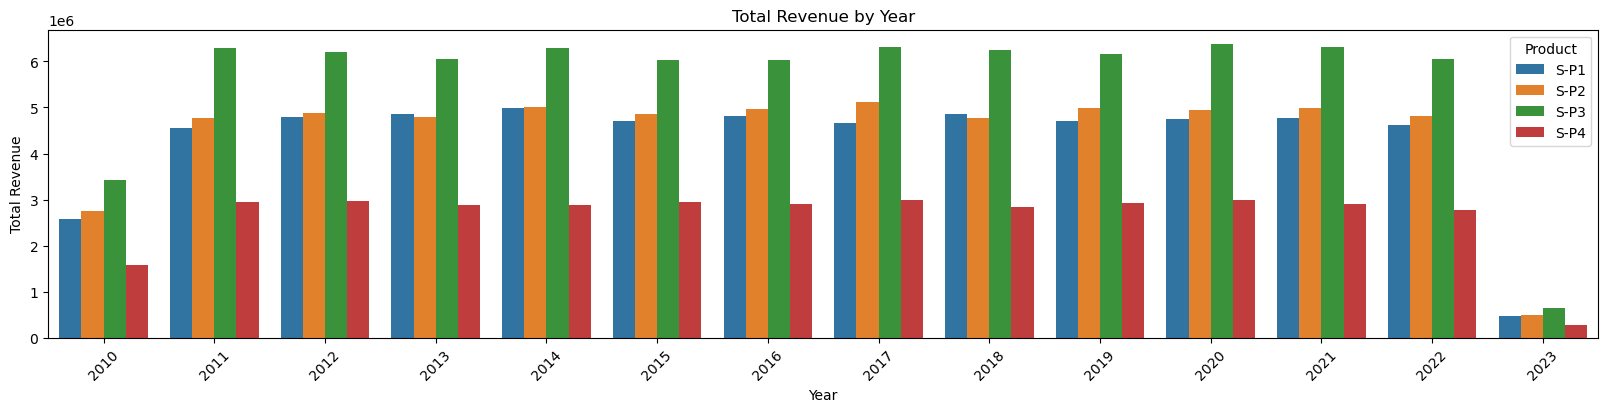

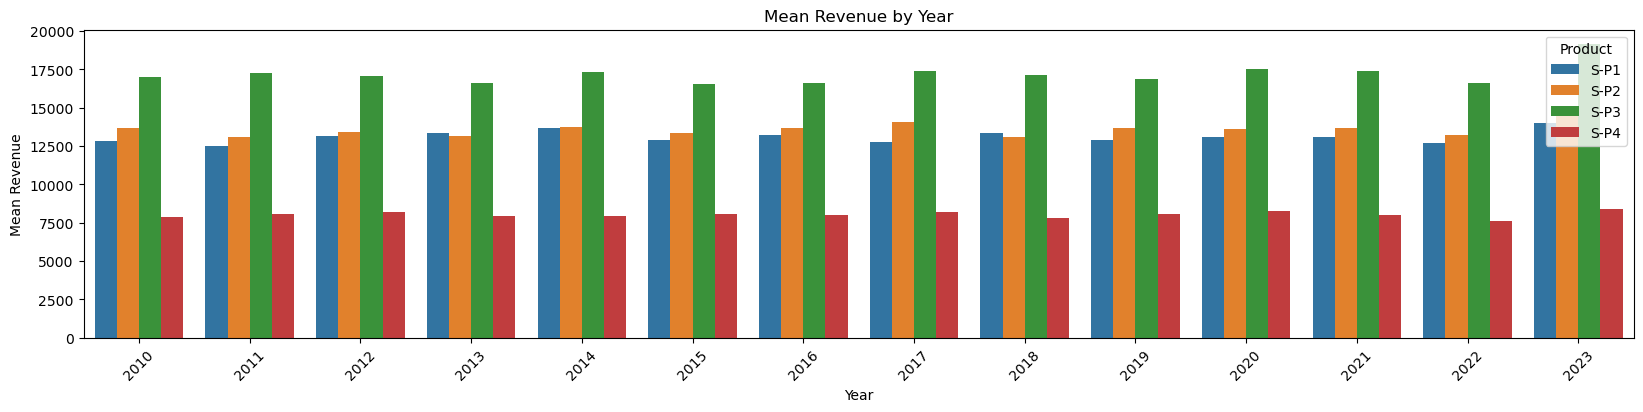

In [11]:
#use the plot_bar_chart function, enter the Revenue Columns and the Revenue string
plot_bar_chart(data, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Total Revenue', 'Year', 'sum')

plot_bar_chart(data, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Mean Revenue', 'Year', 'mean')

In [12]:
data

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


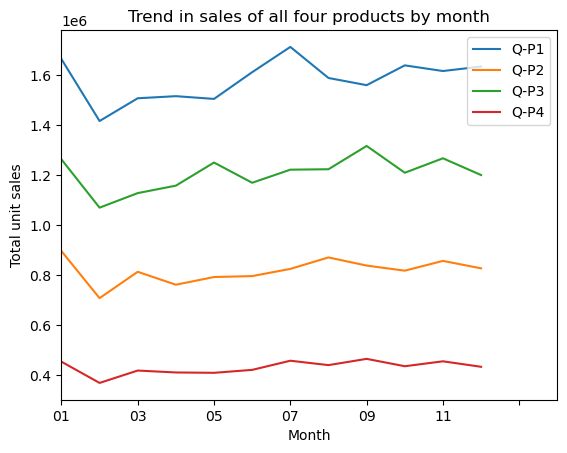

In [16]:
# Create a figure and axis
def month_plot():
    fig, ax = plt.subplots()

    # Plot the sales data for each product by month
    data.groupby('Month')[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum().plot(ax=ax)

    # Set the x-axis limits to only show up to December
    ax.set_xlim(left=0, right=13)

    # Set the axis labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Total unit sales')
    ax.set_title('Trend in sales of all four products by month')
    data['Month'] = data['Month'].replace('9', '09')

    # Show the plot
    plt.show()

month_plot()

In [18]:
#get the 31st day for each month in each year. Note: not every month has 31 days
def month_31_data(df, months):
    m31_data = df[df['Month'].isin(months) & (df['Day'] == '31')]
    return m31_data

_31_months = month_31_data(data, ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
_31_months

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
48,31-07-2010,2733,3985,1341,1428,8663.61,25264.90,7268.22,10181.64,31,07,2010
78,31-08-2010,2564,2772,5371,1819,8127.88,17574.48,29110.82,12969.47,31,08,2010
109,31-9-2010,4986,342,4978,558,15805.62,2168.28,26980.76,3978.54,31,09,2010
170,31-11-2010,4632,3930,523,1581,14683.44,24916.20,2834.66,11272.53,31,11,2010
231,31-01-2011,939,3325,1863,1612,2976.63,21080.50,10097.46,11493.56,31,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4413,31-07-2022,1437,833,1867,1270,4555.29,5281.22,10119.14,9055.10,31,07,2022
4443,31-08-2022,1035,1639,3658,841,3280.95,10391.26,19826.36,5996.33,31,08,2022
4474,31-9-2022,6964,1873,5481,1336,22075.88,11874.82,29707.02,9525.68,31,09,2022
4535,31-11-2022,4600,2006,3796,1426,14582.00,12718.04,20574.32,10167.38,31,11,2022


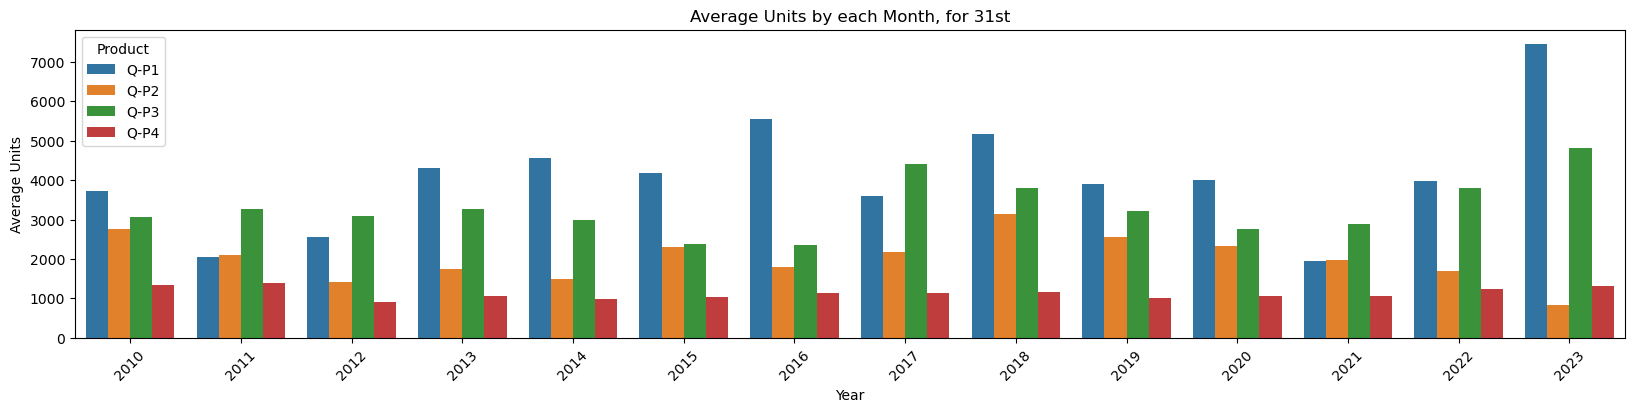

In [19]:
plot_bar_chart(_31_months, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'], 'Average Units', 'each Month, for 31st', 'mean')

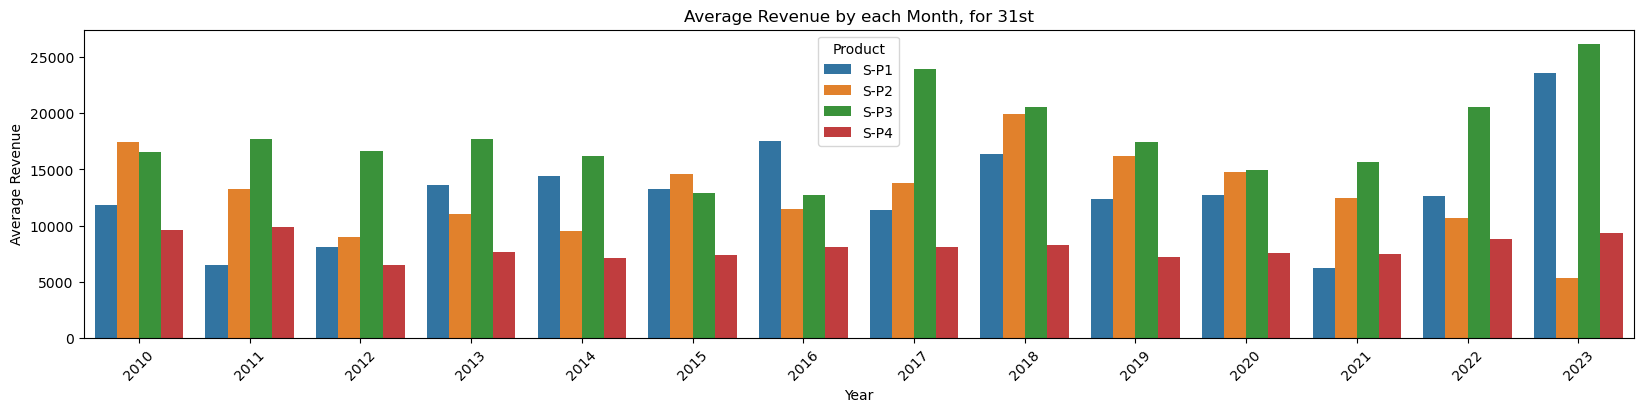

In [20]:
plot_bar_chart(_31_months, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Average Revenue', 'each Month, for 31st', 'mean')

In [22]:
# gives us the average for all the 31st days across all years for each product
def avg_on_31st(df, product):
    df_31 = df[df['Day'] == '31']
    avg_sales = df_31[product].mean()
    return avg_sales
# Average for Unit Sales
avg_on_31st(data, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']).round(2)

Q-P1    3850.73
Q-P2    2076.51
Q-P3    3196.45
Q-P4    1112.13
dtype: float64

In [23]:
# Average for Revenue
avg_on_31st(data, ['S-P1', 'S-P2', 'S-P3', 'S-P4']).round(2)

S-P1    12206.82
S-P2    13165.05
S-P3    17324.76
S-P4     7929.52
dtype: float64